Matplotlib is building the font cache; this may take a moment.
/tmp/xpython_42/3488325966.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.signal import convolve2d


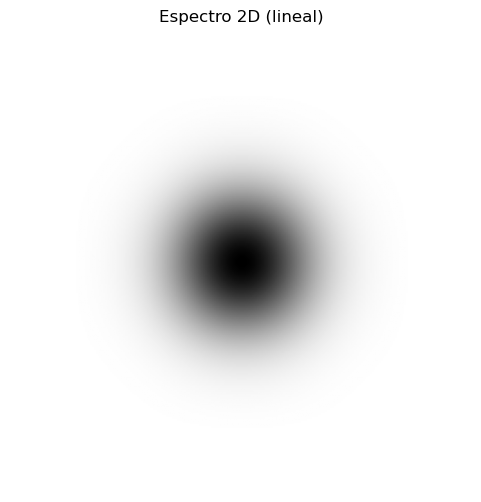

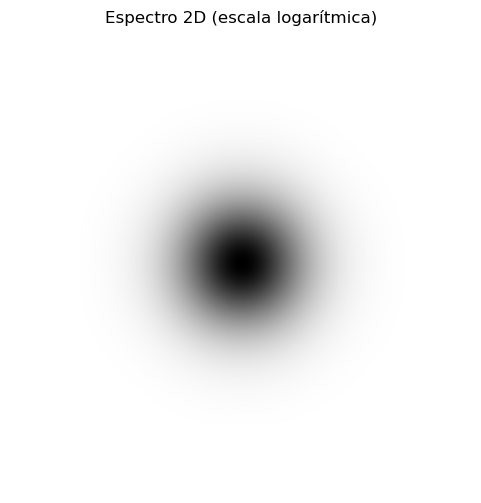

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

# --------------------------
# 1. Definir el filtro
# --------------------------

# Simulación de fspecial('unsharp')
# Es un filtro pasa-altas: imagen - filtro gaussiano suave
def unsharp_filter(size=3, sigma=1.0):
    # Kernel gaussiano
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    kernel /= kernel.sum()
    # Filtro unsharp = delta - gaussiano
    delta = np.zeros_like(kernel)
    delta[size//2, size//2] = 1
    return delta - kernel

h = unsharp_filter(size=9, sigma=1.5)

# --------------------------
# 2. Construir imagen impulso (delta en el centro)
# --------------------------
N = 256
big = np.zeros((N, N))
big[N//2, N//2] = 1  # delta

# --------------------------
# 3. Convolución (respuesta del filtro)
# --------------------------
h1 = convolve2d(big, h, mode='same')

# --------------------------
# 4. FFT (espectro 2D)
# --------------------------
S = np.fft.fft2(h1)
SM = np.abs(S)

# --------------------------
# 5. Mostrar espectro lineal
# --------------------------
plt.figure(figsize=(6,6))
plt.imshow(np.fft.fftshift(SM / SM.max()), cmap='gray')
plt.title("Espectro 2D (lineal)")
plt.axis("off")
plt.show()

# --------------------------
# 6. Mostrar espectro logarítmico
# --------------------------
IMd = np.log(1 + SM)

plt.figure(figsize=(6,6))
plt.imshow(np.fft.fftshift(IMd / IMd.max()), cmap='gray')
plt.title("Espectro 2D (escala logarítmica)")
plt.axis("off")
plt.show()


In [ ]:
"""
Lo que hace el archivo ex1.m traducido arriba a python es crea un filtro low o hi pass, en este caso high pass, luego genera
una imagen delta con un pulso unitario en el centro. Luego se convoluciona la delta con el filtro y se calcula la transformada
de Fourier del resultado, luego se aplica el absoluto del resultado para saber la magnitud no la fase de las frecuencias.
Luego muestra el espectro en dos escalas lineal y logaritmica, que teniendo la logaritmica nos permite: comprimir el rango 
dinámico, permitiendo ver detalles en las zonas donde hay valores muy pequeños.
"""

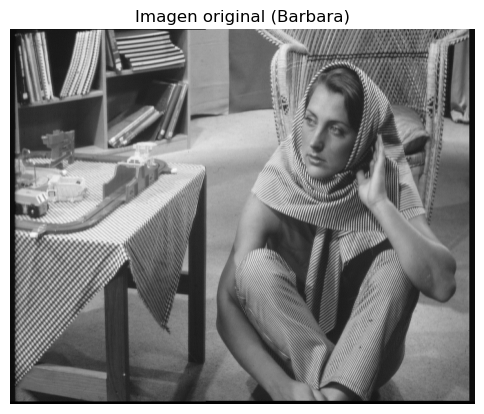

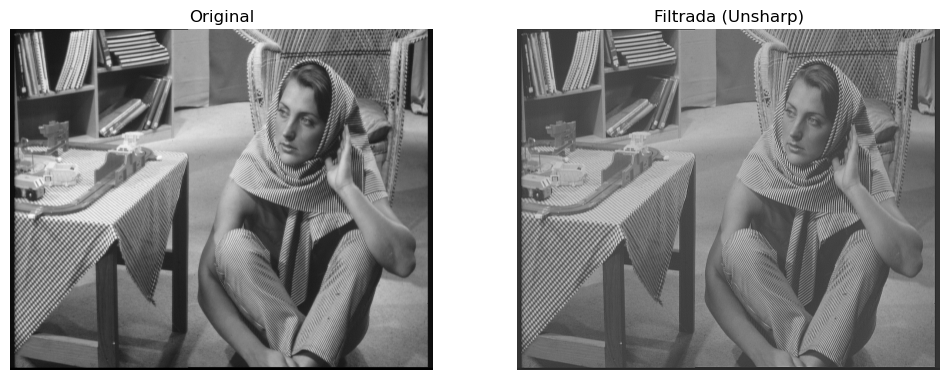

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from PIL import Image

# -------------------------
# 1. Cargar imagen
# -------------------------
# Usamos la imagen que subiste (asegúrate de tenerla en el entorno)
img = Image.open("barbara.gif").convert("L")  # convertir a escala de grises
b = np.array(img)

plt.figure(figsize=(6,6))
plt.imshow(b, cmap="gray")
plt.title("Imagen original (Barbara)")
plt.axis("off")
plt.show()

# -------------------------
# 2. Definir filtros
# -------------------------

# Filtro unsharp (pasa-altas)
def unsharp_filter(size=5, sigma=1.0):
    # kernel gaussiano
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    kernel /= kernel.sum()
    # delta en el centro
    delta = np.zeros_like(kernel)
    delta[size//2, size//2] = 1
    return delta + (delta - kernel)  # realce (sharpen)

# Filtro tipo disco (pasa-bajas aproximado)
def disk_filter(size=5):
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    mask = (xx**2 + yy**2) <= (size//2)**2
    kernel = mask.astype(float)
    kernel /= kernel.sum()
    return kernel

# Seleccionar filtro
h = unsharp_filter(size=7, sigma=1.0)   # pasa-altas
# h = disk_filter(size=7)                # pasa-bajas (descomentar para probar)

# -------------------------
# 3. Aplicar filtro a la imagen
# -------------------------
h1 = convolve2d(b, h, mode="same", boundary="symm")

# -------------------------
# 4. Mostrar resultado
# -------------------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(b, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(h1, cmap="gray")
plt.title("Filtrada (Unsharp)")
plt.axis("off")

plt.show()


In [ ]:
"""
Lo que hace el archivo ex2.m es:
Primero se define un kernel suave (parecido a un filtro promedio). Luego se normaliza (h = h/sum(h(:))). Finalmente, 
el filtro se sobrescribe con fspecial('unsharp'), que crea un filtro de realce de bordes (pasa-altas).
Si en vez de eso se usara fspecial('disk'), se obtendría un filtro suavizante (pasa-bajas).

Se abre la imagen barbara.gif, y se muestra en escala de grises, luego se aplica la convolución 2D entre la imagen y 
el filtro. Primero muestra la imagen original. Luego muestra la imagen filtrada
"""

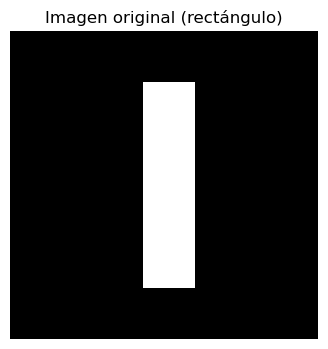

Mínimo: 0.0
Máximo: 100.0


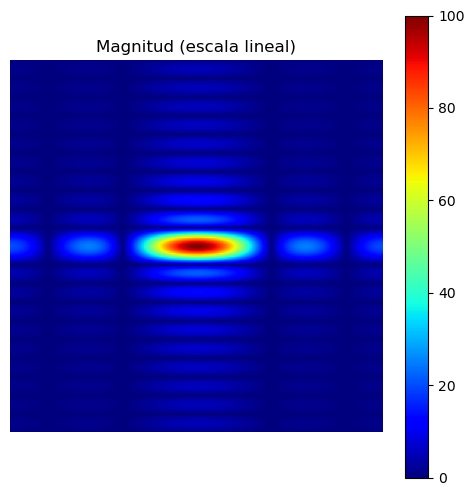

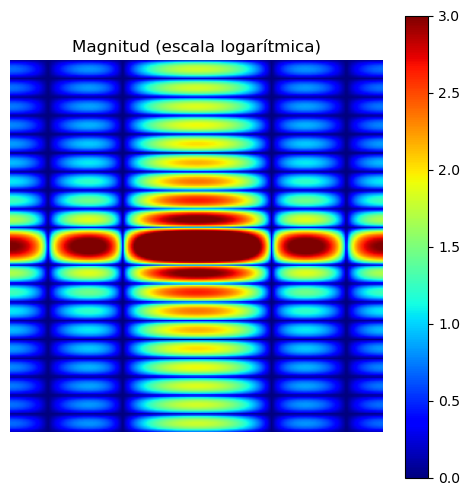

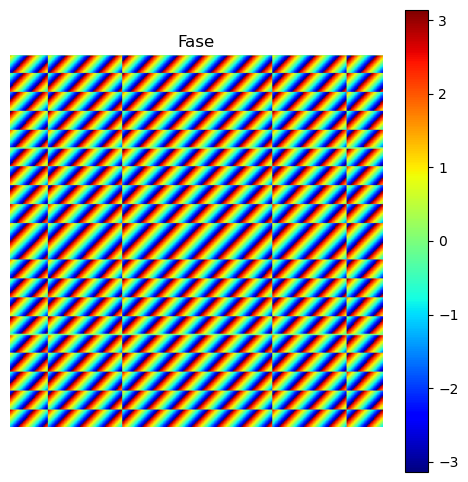

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Construir imagen
# -------------------------
f = np.zeros((30,30))
f[5:25, 13:18] = 1   # rectángulo blanco
plt.figure(figsize=(4,4))
plt.imshow(f, cmap="gray")
plt.title("Imagen original (rectángulo)")
plt.axis("off")
plt.show()

# -------------------------
# 2. FFT con zero-padding a 256x256
# -------------------------
F = np.fft.fft2(f, s=(256,256))
F = np.fft.fftshift(F)  # centrar espectro

# -------------------------
# 3. Magnitud del espectro
# -------------------------
magnitude = np.abs(F)
print("Mínimo:", magnitude.min())   # 0
print("Máximo:", magnitude.max())   # 100 (aprox)

# Escala lineal
plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap="jet", vmin=0, vmax=100)
plt.title("Magnitud (escala lineal)")
plt.colorbar()
plt.axis("off")
plt.show()

# Escala logarítmica
plt.figure(figsize=(6,6))
plt.imshow(np.log1p(magnitude), cmap="jet", vmin=0, vmax=3)
plt.title("Magnitud (escala logarítmica)")
plt.colorbar()
plt.axis("off")
plt.show()

# -------------------------
# 4. Fase del espectro
# -------------------------
phase = np.angle(F)
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap="jet", vmin=-np.pi, vmax=np.pi)
plt.title("Fase")
plt.colorbar()
plt.axis("off")
plt.show()


In [ ]:
"""
El archivo spect.m hace lo siguiente:
Primero se construye la imagen f, se crea una matriz 30×30 llena de ceros. En las filas 5–24 y columnas 13–17 se ponen 
unos (1). Esto genera un rectángulo blanco en el centro sobre fondo negro.

Luego se calcula la FFT, incrustando la imagen en un lienzo más grande 256×256 (relleno con ceros → zero-padding). 
fftshift(F) → mueve el cero de frecuencia al centro de la imagen espectral.

Luego para mostrar la magnitud del espectro: se calcula abs(F). Se visualiza en dos escalas: Escala lineal y Escala 
logarítmica. La escala logarítmica permite ver detalles en frecuencias débiles que en la escala lineal quedan invisibles.

Luego para mostrar la fase del espectro: angle(F) devuelve los ángulos de cada componente de frecuencia y se muestra en 
falso color (colormap jet). Esto permite analizar cómo se distribuyen los desfases de las ondas que componen la imagen
"""

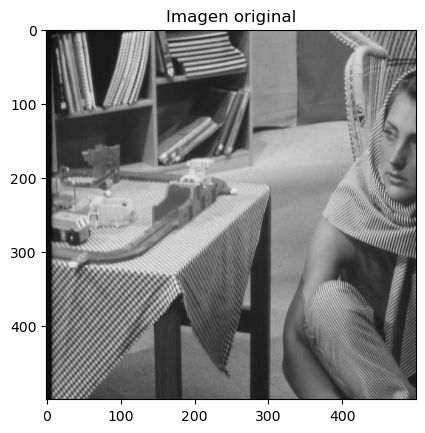

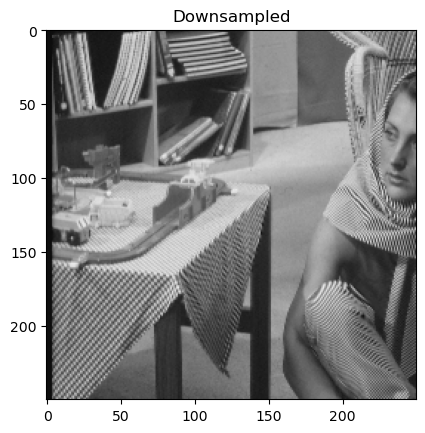

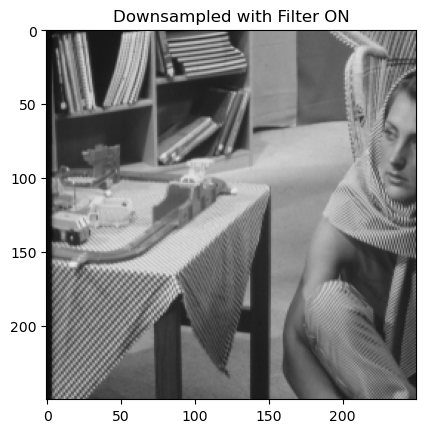

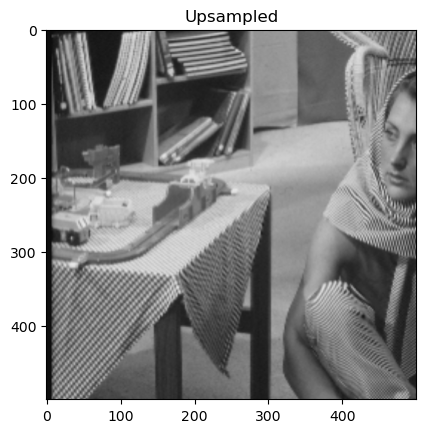

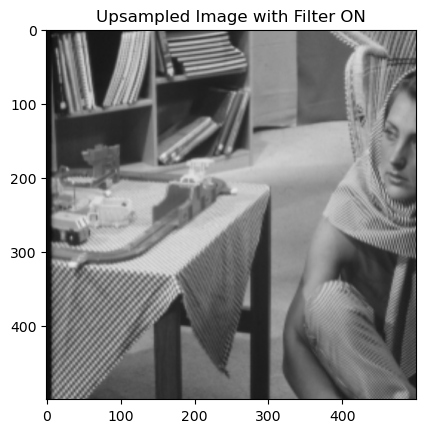

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom

# -----------------------------
# Funciones de downsampling/upsampling
# -----------------------------
def downsampling(img, m, filter_type='FILTER_OFF'):
    """
    Downsample la imagen por un factor m.
    Si filter_type='FILTER_ON', aplica un promedio simple como filtro anti-aliasing.
    """
    if filter_type == 'FILTER_ON':
        # Filtro promedio simple 2x2 (promedio local)
        kernel_size = m
        # Convertir a float para el promedio
        img = img.astype(float)
        # Promedio en bloques de tamaño m
        img = img[:img.shape[0]//kernel_size*kernel_size,
                  :img.shape[1]//kernel_size*kernel_size]  # recortar al múltiplo de m
        img = img.reshape(img.shape[0]//kernel_size, kernel_size,
                          img.shape[1]//kernel_size, kernel_size)
        img = img.mean(axis=(1,3))
    else:
        # Solo tomar cada m-ésimo pixel
        img = img[::m, ::m]
    return img

def upsampling(img, m):
    """
    Upsample la imagen por un factor m usando interpolación bilineal simple
    """
    return zoom(img, m, order=1)  # order=1 -> bilinear

# -----------------------------
# Programa principal
# -----------------------------

m = 2

# Leer la imagen
f1 = Image.open("barbara.gif").convert('L')  # convertir a escala de grises
f1 = np.array(f1)
f1 = f1[:500, :500]  # recortar a 500x500

# Downsampling
f2 = downsampling(f1, m, filter_type='FILTER_OFF')
f2f = downsampling(f1, m, filter_type='FILTER_ON')  # filtro activado

# Upsampling
f3 = upsampling(f2, m)
f3f = upsampling(f2f, m)

# Mostrar imágenes
plt.figure()
plt.title("Imagen original")
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.title("Downsampled")
plt.imshow(f2, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.title("Downsampled with Filter ON")
plt.imshow(f2f, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.title("Upsampled")
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.title("Upsampled Image with Filter ON")
plt.imshow(f3f, cmap='gray', vmin=0, vmax=255)

plt.show()


In [ ]:
"""
Este codigo es la traduccion del codigo del archivo viasampling.m y hace lo siguiente:

Toma la imagen barbara.gif y la convierte en una escala de grises, luego se recorta a 500px x 500px.
Se le aplica downsamplig, que toma un pixel cada m descartando la mitad, tanto con filtro como sin el. Con el filtro antes del
downsampling se le aplica un filtro pasabajos que suavisa la imagen, para prevenir aliasing. Quedando una imagen 
de 250px x 250px.
A partir de esta imagen downsampleada se le aplica un upsampling que la vuelve a convertir en una imagen 500px x 500px.
Básicamente inserta ceros/píxeles vacíos y suele interpolar. Y luego se muestran la imagenes.
"""

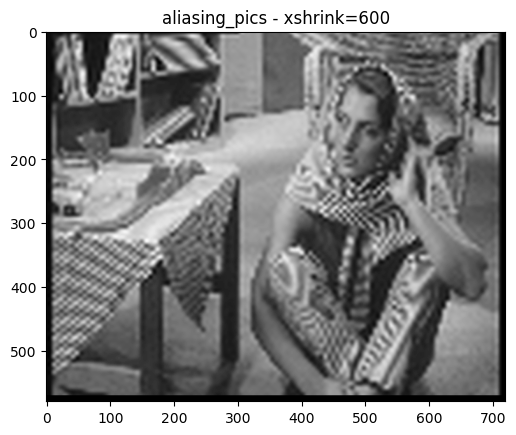

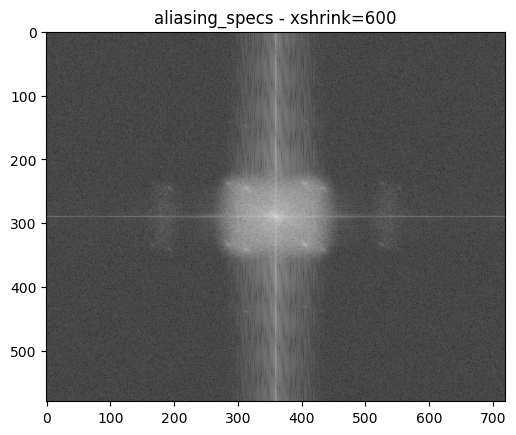

In [2]:
import numpy as np
from PIL import Image
from scipy.ndimage import affine_transform
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# -----------------------------
# Cargar imagen
# -----------------------------
f = Image.open("barbara.gif").convert('L')
f = np.array(f)
ysize, xsize = f.shape

# -----------------------------
# Factor de shrink
# -----------------------------
xshrinks = list(range(0, 601, 5))

# -----------------------------
# Función para generar frames de imagen reconstruida
# -----------------------------
def generate_frames_image():
    frames = []
    for xshrink in xshrinks:
        desiredxsize = xsize - xshrink
        scale_shrink = desiredxsize / xsize
        
        # Downscale
        f2 = affine_transform(f, np.linalg.inv([[scale_shrink,0],[0,scale_shrink]]),
                              output_shape=(int(ysize*scale_shrink), int(desiredxsize)))
        
        # Upscale back
        currentxsize = f2.shape[1]
        scale_boost = xsize / currentxsize
        f3 = affine_transform(f2, np.linalg.inv([[scale_boost,0],[0,scale_boost]]),
                              output_shape=(ysize, xsize))
        
        # Normalizar
        f3_norm = (f3 / np.max(f3) * 255).astype(np.uint8)
        frames.append(f3_norm)
    return frames

# -----------------------------
# Función para generar frames del espectro
# -----------------------------
def generate_frames_spectrum():
    frames = []
    for xshrink in xshrinks:
        desiredxsize = xsize - xshrink
        scale_shrink = desiredxsize / xsize
        
        # Downscale
        f2 = affine_transform(f, np.linalg.inv([[scale_shrink,0],[0,scale_shrink]]),
                              output_shape=(int(ysize*scale_shrink), int(desiredxsize)))
        
        # Upscale back
        currentxsize = f2.shape[1]
        scale_boost = xsize / currentxsize
        f3 = affine_transform(f2, np.linalg.inv([[scale_boost,0],[0,scale_boost]]),
                              output_shape=(ysize, xsize))
        
        # Fourier spectrum
        Fd = fftshift(np.log(1 + np.abs(fft2(f3))))
        Fd_norm = (Fd / np.max(Fd) * 255).astype(np.uint8)
        frames.append(Fd_norm)
    return frames

# -----------------------------
# Generar frames
# -----------------------------
frames_image = generate_frames_image()
frames_spectrum = generate_frames_spectrum()

# -----------------------------
# Guardar animación de imagen reconstruida
# -----------------------------
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(frames_image[0], cmap='gray', vmin=0, vmax=255)
ax1.set_title("aliasing_pics")

def update_image(frame):
    im1.set_data(frames_image[frame])
    ax1.set_title(f"aliasing_pics - xshrink={xshrinks[frame]}")
    return [im1]

ani_image = FuncAnimation(fig1, update_image, frames=len(frames_image), interval=100, blit=True)
ani_image.save("aliasing_pics.gif", writer=PillowWriter(fps=10))

# -----------------------------
# Guardar animación del espectro
# -----------------------------
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(frames_spectrum[0], cmap='gray', vmin=0, vmax=255)
ax2.set_title("aliasing_specs")

def update_spectrum(frame):
    im2.set_data(frames_spectrum[frame])
    ax2.set_title(f"aliasing_specs - xshrink={xshrinks[frame]}")
    return [im2]

ani_spectrum = FuncAnimation(fig2, update_spectrum, frames=len(frames_spectrum), interval=100, blit=True)
ani_spectrum.save("aliasing_specs.gif", writer=PillowWriter(fps=10))

plt.show()


In [ ]:
"""
El codigo de arriba es una traduccion a Python del codigo del archivo image_aliasing_new.m

El codigo abre la image y la convierte en escala de grises y luego entre un rango de 0 a 600 con saltos de 5,
empieza a downsamplear la imagen al valor image_size - valor del rango y luego vuelve a upsamplear la imagen al tamaño 
original y luego en un caso se aplica normalizacion para ver la imagen y calcula la transformada de fourier para ver el
espectro de la imagen.
Luego guarda cada resultado como un fotograma de un video o secuencia de imagenes en este caso un gif para ambos la imagen y
su espectro.
El punto del codigo es ver como cambia la imagen y el espectro por el aliasing cuando una imagen se downsamplea a distintos
tamaños/resoluciones.
"""